### Problem Statement :

**Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.**

### Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None) # For display maximum columns
pd.set_option('display.max_rows', None) # For display maximum rows
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_excel(r"C:\Users\Kushal Arya\Desktop\csv file\customer_retention_dataset.xlsx", sheet_name = 'codedsheet')
df.head(2)

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1                                                  1                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                                  1                                                                                                                
1                                                  1                                                                                                                

   13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                                  1                                                                            
1                                                  4                                                                            

   14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                                  3                                                                                                           
1                                                  5                                                                                                           

   15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                                                  4                                                                                                                                 

In [3]:
df2 = pd.read_excel(r"C:\Users\Kushal Arya\Desktop\csv file\customer_retention_dataset.xlsx")
df2.head(2)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome                                                                                 

  12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                      Search Engine                                                                                                               
1                                      Search Engine                                                                                                               

  13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                      Search Engine                                                                           
1                                    Via application                                                                           

  14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                          6-10 mins                                                                                                          
1                                  more than 15 mins                                                                                                          

  15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                 E-wallets (Paytm, Freecharge etc.)                                                                                                                                   
1                                

### Check no of row and column

In [6]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (269, 71)


### Checking for Null values

In [4]:
print('============================================================================================\n')
print(df.isnull().sum())
print('\n=============================================================================================')


1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                         

#### There is no null value

### Information about dataset

In [8]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                   

#### Categorical data present in our data set

### Statistics of Data

In [13]:
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                             

#### Outliers are present in our data set

### Drop Unwanted Columns

In [5]:
col = ['4 What is the Pin Code of where you shop online from?','Easy to use website or application','Visual appealing web-page layout','Wild variety of product on offer','Complete, relevant description information of products','Fast loading website speed of website and application','Reliability of the website or application','Quickness to complete purchase',
      'Availability of several payment options','Privacy of customers’ information','Security of customer financial information','Perceived Trustworthiness','Presence of online assistance through multi-channel','Longer time to get logged in (promotion, sales period)',
      'Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)','Longer page loading time (promotion, sales period)','Limited mode of payment on most products (promotion, sales period)',
      'Longer delivery period','Change in website/Application design','Frequent disruption when moving from one page to another','Website is as efficient as before','Which of the Indian online retailer would you recommend to a friend?']

In [6]:
df = df.drop(col, axis = 1)
df.head(2)

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1                                                  1                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                                  1                                                                                                                
1                                                  1                                                                                                                

   13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                                  1                                                                            
1                                                  4                                                                            

   14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                                  3                                                                                                           
1                                                  5                                                                                                           

   15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                                                  4                                                                                                                                    
1                                                  1                                                                                                                             

In [7]:
df.drop(df.columns[[-1,]], axis=1, inplace=True)

In [8]:
df.drop(df.columns[[-1,]], axis=1, inplace=True)

In [9]:
df.head(2)

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1                                                  1                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                                  1                                                                                                                
1                                                  1                                                                                                                

   13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                                  1                                                                            
1                                                  4                                                                            

   14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                                  3                                                                                                           
1                                                  5                                                                                                           

   15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                                                  4                                                                                                                                    
1                                                  1                                                                                                                             

### Analysis of Data

### 1 Gender of respondent column

In [39]:
df2['1Gender of respondent'].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

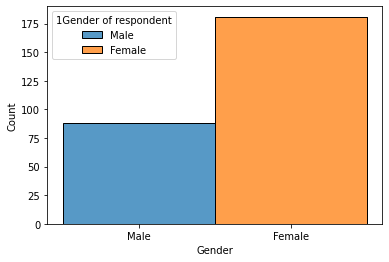

In [133]:
sns.histplot(binwidth=0.5, x="1Gender of respondent", hue="1Gender of respondent", data=df2, stat="count", multiple="stack")
plt.xlabel('Gender')
plt.show()

#### No of Female is more than Male 

In [42]:
df2['38 User satisfaction cannot exist without trust'].value_counts()

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64

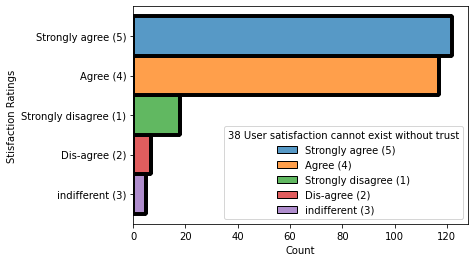

In [132]:
sns.histplot(binwidth=0.5, y="38 User satisfaction cannot exist without trust", hue="38 User satisfaction cannot exist without trust", data=df2, stat="count", multiple="stack")
plt.ylabel('Stisfaction Ratings')
plt.show()

#### Above plot shows satisfaction ratings of customer

In [46]:
gender = df2.groupby('1Gender of respondent')['38 User satisfaction cannot exist without trust'].value_counts()
gender

1Gender of respondent  38 User satisfaction cannot exist without trust
Female                 Strongly agree (5)                                 88
                       Agree (4)                                          78
                       Strongly disagree (1)                              11
                       Dis-agree (2)                                       4
Male                   Agree (4)                                          39
                       Strongly agree (5)                                 34
                       Strongly disagree (1)                               7
                       indifferent (3)                                     5
                       Dis-agree (2)                                       3
Name: 38 User satisfaction cannot exist without trust, dtype: int64

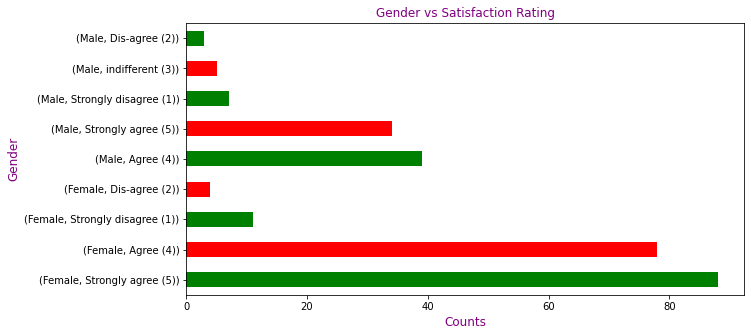

In [48]:
gender.plot.barh(figsize = (10,5), color = ['g','r'])
plt.xlabel('Counts', c = 'purple', fontsize = 12)
plt.ylabel('Gender', c = 'purple', fontsize = 12 )
plt.title('Gender vs Satisfaction Rating', c = 'purple', fontsize = 12)
plt.show()

#### Above Plot shows Female customer express their experience of shopping through ratings more than Male customer and they are highly satisfied than male customer 👍👍


### 2 How old are you? column

In [68]:
age = df2.iloc[:,[1]].value_counts()
age

2 How old are you? 
31-40 years            81
21-30 years            79
41-50 yaers            70
Less than 20 years     20
51 years and above     19
dtype: int64

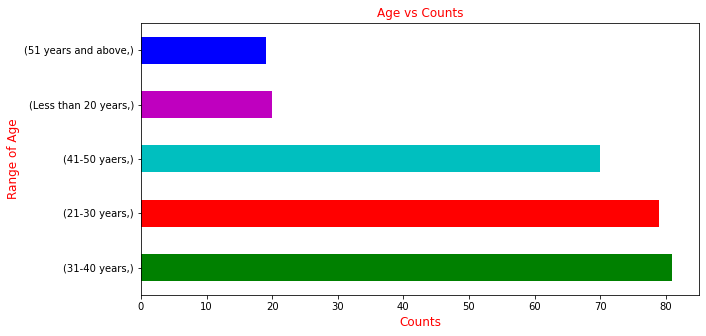

In [73]:
age.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Range of Age', c = 'r', fontsize = 12 )
plt.title('Age vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows age of customer . Age of 21 to 40 is higest 👍

### 3 Which city do you shop online from? column

In [78]:
df2['3 Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

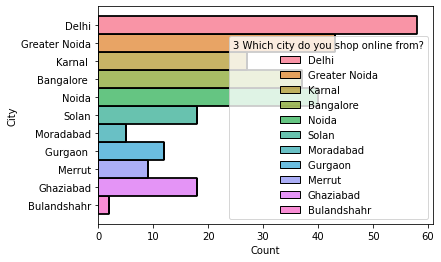

In [130]:
sns.histplot(binwidth=0.5, y="3 Which city do you shop online from?", hue="3 Which city do you shop online from?", data=df2, stat="count", multiple="stack")
plt.ylabel('City')
plt.show()

#### Above plot shows Delhi is highest no of online shoping 👍 and Bulandshar has lowest  👎

In [84]:
city = df2.groupby('3 Which city do you shop online from?')['38 User satisfaction cannot exist without trust'].value_counts().sort_values()
city

3 Which city do you shop online from?  38 User satisfaction cannot exist without trust
Gurgaon                                Strongly disagree (1)                               1
Bulandshahr                            indifferent (3)                                     2
Greater Noida                          Strongly disagree (1)                               2
Noida                                  Dis-agree (2)                                       3
Bangalore                              indifferent (3)                                     3
Merrut                                 Strongly disagree (1)                               3
                                       Strongly agree (5)                                  3
                                       Agree (4)                                           3
Ghaziabad                              Dis-agree (2)                                       4
Gurgaon                                Agree (4)                            

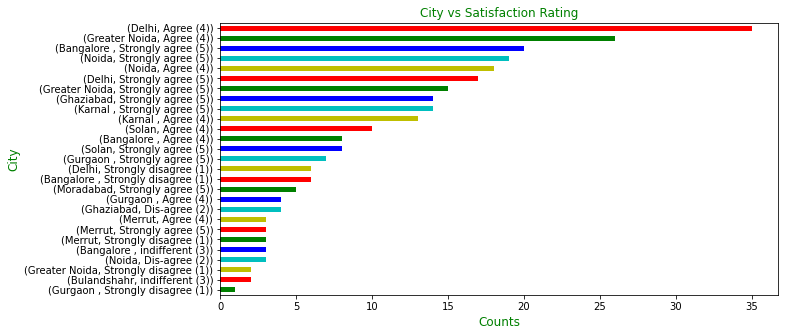

In [85]:
city.plot.barh(figsize = (10,5), color = ['g','r', 'y', 'c', 'b'])
plt.xlabel('Counts', c = 'g', fontsize = 12)
plt.ylabel('City', c = 'g', fontsize = 12 )
plt.title('City vs Satisfaction Rating', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows Delhi customer more participate giving rating and they give highest satisfaction rating 👍👍

### 5 Since How Long You are Shopping Online ? column

In [88]:
df2['5 Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

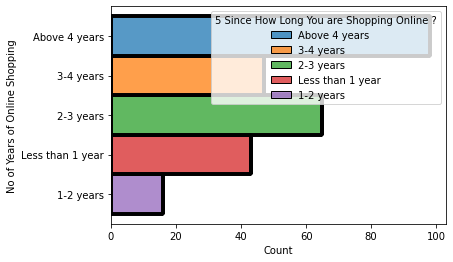

In [129]:
sns.histplot(binwidth=0.5, y="5 Since How Long You are Shopping Online ?", hue="5 Since How Long You are Shopping Online ?", data=df2, stat="count", multiple="stack")
plt.ylabel('No of Years of Online Shopping')
plt.show()

In [95]:
y = df2.groupby('5 Since How Long You are Shopping Online ?')['38 User satisfaction cannot exist without trust'].value_counts()
y

5 Since How Long You are Shopping Online ?  38 User satisfaction cannot exist without trust
1-2 years                                   Agree (4)                                           7
                                            Strongly agree (5)                                  7
                                            indifferent (3)                                     2
2-3 years                                   Strongly agree (5)                                 37
                                            Agree (4)                                          25
                                            Strongly disagree (1)                               3
3-4 years                                   Agree (4)                                          23
                                            Strongly agree (5)                                 15
                                            Strongly disagree (1)                               6
                          

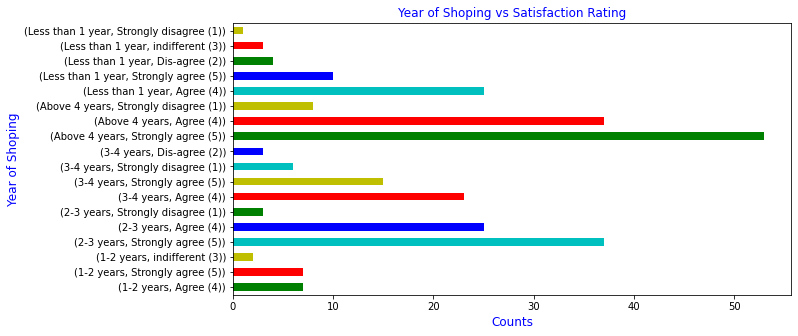

In [96]:
y.plot.barh(figsize = (10,5), color = ['g','r', 'y', 'c', 'b'])
plt.xlabel('Counts', c = 'b', fontsize = 12)
plt.ylabel('Year of Shoping', c = 'b', fontsize = 12 )
plt.title('Year of Shoping vs Satisfaction Rating', c = 'b', fontsize = 12)
plt.show()

#### Above plot show customer who shop more than 4 years and strongly agree they give high no of couts 👍 and less than 1 years is lowest counts 👎

### 6 How many times you have made an online purchase in the past 1 year? column

In [103]:
df2['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

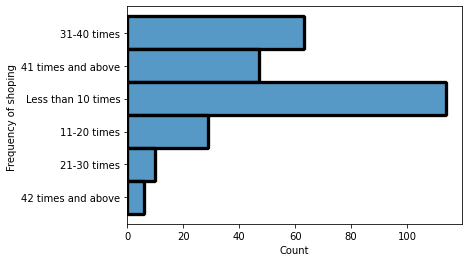

In [128]:
sns.histplot(binwidth=0.5, y="6 How many times you have made an online purchase in the past 1 year?", data=df2, stat="count", multiple="stack")
plt.ylabel('Frequency of shoping ')
plt.show()

#### Above plot show counts of frequent buyer is lowest 👎

In [108]:
fb = df2.groupby('6 How many times you have made an online purchase in the past 1 year?')['38 User satisfaction cannot exist without trust'].value_counts()
fb

6 How many times you have made an online purchase in the past 1 year?  38 User satisfaction cannot exist without trust
11-20 times                                                            Strongly agree (5)                                 23
                                                                       Agree (4)                                           6
21-30 times                                                            Strongly agree (5)                                  7
                                                                       Dis-agree (2)                                       3
31-40 times                                                            Strongly agree (5)                                 29
                                                                       Agree (4)                                          24
                                                                       Strongly disagree (1)                              10
41 tim

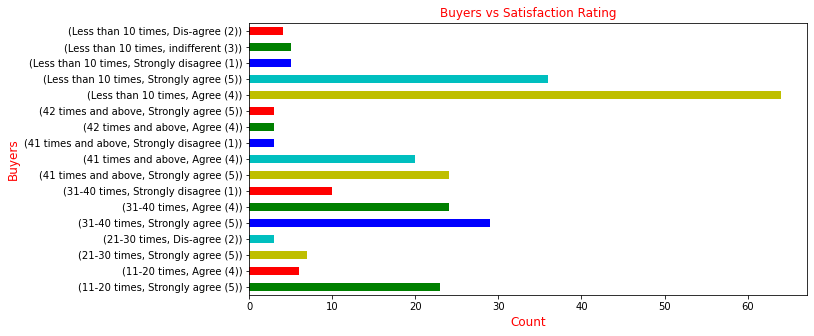

In [109]:
fb.plot.barh(figsize = (10,5), color = ['g','r', 'y', 'c', 'b'])
plt.xlabel('Count', c = 'r', fontsize = 12)
plt.ylabel('Buyers', c = 'r', fontsize = 12 )
plt.title('Buyers vs Satisfaction Rating', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows customer who buy less than 10 times in 1 year they have highest stisfaction rating counts 👌👍

### 7 How do you access the internet while shopping on-line? column

In [112]:
df2['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

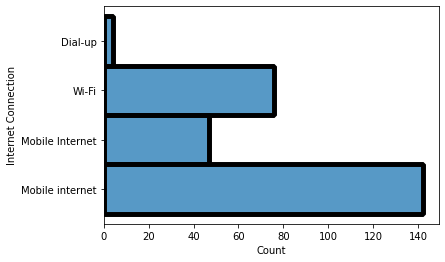

In [127]:
sns.histplot(binwidth=0.5, y="7 How do you access the internet while shopping on-line?", data=df2, stat="count", multiple="stack")
plt.ylabel('Internet Connection')
plt.show()

#### Above plot Shows for shoping mostly people use moblie internet 👍

### 8 Which device do you use to access the online shopping? column

In [121]:
df2['8 Which device do you use to access the online shopping?'].value_counts()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

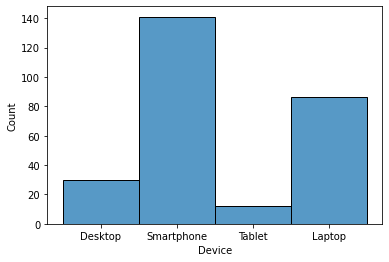

In [126]:
sns.histplot(binwidth=0.5, x="8 Which device do you use to access the online shopping?", data=df2, stat="count", multiple="stack")
plt.xlabel('Device')
plt.show()

#### Above plot shows people use smartphone to online shopling 👍

### 10 What is the operating system (OS) of your device? column

In [136]:
os = df2.iloc[:,[9]].value_counts()
os

10 What is the operating system (OS) of your device?\t\t\t\t                                          
Window/windows Mobile                                                                                     122
Android                                                                                                    85
IOS/Mac                                                                                                    62
dtype: int64

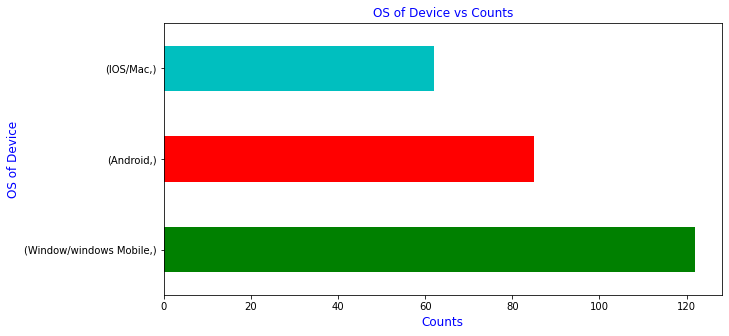

In [137]:
os.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'b', fontsize = 12)
plt.ylabel('OS of Device', c = 'b', fontsize = 12 )
plt.title('OS of Device vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Above plot shows people use Windows and Mobile more 👍👍

### 11 What browser do you run on your device to access the website? column

In [139]:
browser = df2.iloc[:,[10]].value_counts()
browser

11 What browser do you run on your device to access the website?\t\t\t                                                          
Google chrome                                                                                                                       216
Safari                                                                                                                               40
Opera                                                                                                                                 8
Mozilla Firefox                                                                                                                       5
dtype: int64

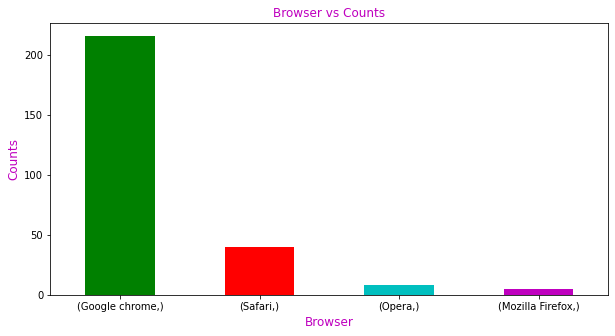

In [141]:
browser.plot.bar(figsize = (10,5),rot= 360, color = ['g','r','c','m','b'])
plt.xlabel('Browser', c = 'm', fontsize = 12)
plt.ylabel('Counts', c = 'm', fontsize = 12 )
plt.title('Browser vs Counts', c = 'm', fontsize = 12)
plt.show()

#### Above plot shows people use Google chrome more 👍👍

### 12 Which channel did you follow to arrive at your favorite online store for the first time? column

In [144]:
channel = df2.iloc[:,[11]].value_counts()
channel

12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   
Search Engine                                                                                                                                                     230
Content Marketing                                                                                                                                                  20
Display Adverts                                                                                                                                                    19
dtype: int64

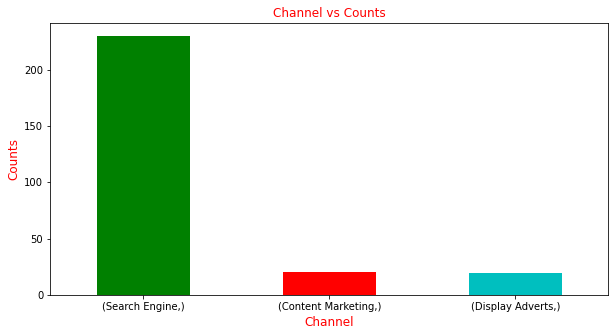

In [146]:
channel.plot.bar(figsize = (10,5), rot = 360, color = ['g','r','c','m','b'])
plt.xlabel('Channel', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12 )
plt.title('Channel vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows Search Engine counts highest 👍👍

### 13 After first visit, how do you reach the online retail store? column

In [148]:
store = df2.iloc[:,[12]].value_counts()
store

13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   
Search Engine                                                                                                                 87
Via application                                                                                                               86
Direct URL                                                                                                                    70
E-mail                                                                                                                        18
Social Media                                                                                                                   8
dtype: int64

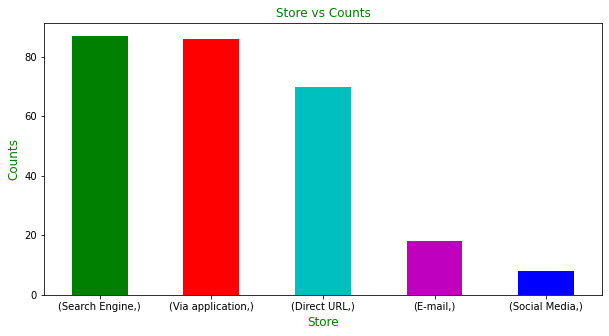

In [150]:
store.plot.bar(figsize = (10,5),rot = 360, color = ['g','r','c','m','b'])
plt.xlabel('Store', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12 )
plt.title('Store vs Counts', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows people use search engine more 👍👍

### 14 How much time do you explore the e- retail store before making a purchase decision? column

In [154]:
estore = df2.iloc[:,[13]].value_counts()
estore

14 How much time do you explore the e- retail store before making a purchase decision?                                                                   
more than 15 mins                                                                                                                                            123
6-10 mins                                                                                                                                                     71
11-15 mins                                                                                                                                                    46
Less than 1 min                                                                                                                                               15
1-5 mins                                                                                                                                                      14
dtype: int64

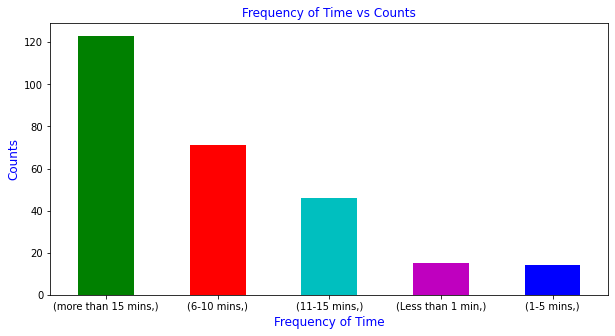

In [155]:
estore.plot.bar(figsize = (10,5), rot = 360, color = ['g','r','c','m','b'])
plt.xlabel('Frequency of Time', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12 )
plt.title('Frequency of Time vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Above plot shows people spend more than 15 mins before making a purchase decision 👍👍

### 15 What is your preferred payment Option? column

In [157]:
payment = df2.iloc[:,[14]].value_counts()
payment

15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               
Credit/Debit cards                                                                                                                                                                    148
Cash on delivery (CoD)                                                                                                                                                                 76
E-wallets (Paytm, Freecharge etc.)                                                                                                                                                     45
dtype: int64

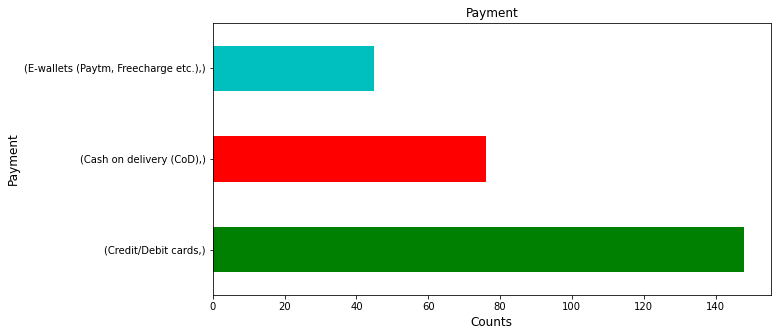

In [159]:
payment.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'k', fontsize = 12)
plt.ylabel('Payment', c = 'k', fontsize = 12 )
plt.title('Payment', c = 'k', fontsize = 12)
plt.show()

#### Above plot shows people use Credit/Debit cards more than any option 👍👍

### 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart? column

In [161]:
cart = df2.iloc[:,[16]].value_counts()
cart

17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       
Better alternative offer                                                                                                                                                                                               133
Promo code not applicable                                                                                                                                                                                               54
Change in price                                                                                                                                                                                                         37
Lack of trust                                                                                                                      

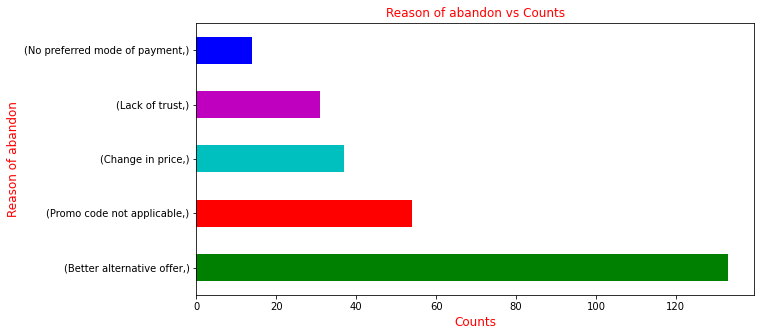

In [162]:
cart.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Reason of abandon', c = 'r', fontsize = 12 )
plt.title('Reason of abandon vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows better alternative offer reason of abandon is most 👎👎

### 17 Why did you abandon the “Bag”, “Shopping Cart”? column

In [165]:
bag = df2.iloc[:,[16]].value_counts()
bag

17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       
Better alternative offer                                                                                                                                                                                               133
Promo code not applicable                                                                                                                                                                                               54
Change in price                                                                                                                                                                                                         37
Lack of trust                                                                                                                      

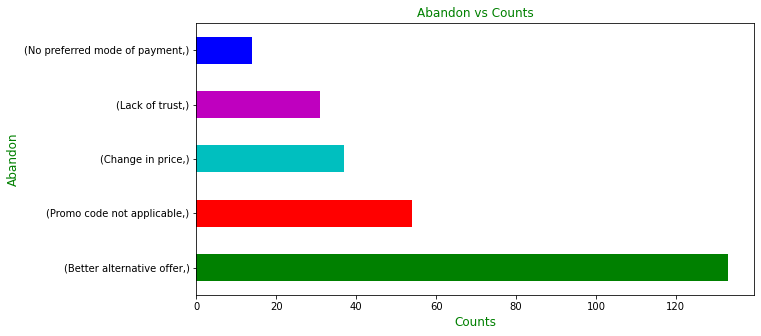

In [166]:
bag.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'g', fontsize = 12)
plt.ylabel('Abandon', c = 'g', fontsize = 12 )
plt.title('Abandon vs Counts', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows better alternative offer reason of abandon is most 👎👎

### 18 The content on the website must be easy to read and understand column

In [168]:
website = df2.iloc[:,[17]].value_counts()
website

18 The content on the website must be easy to read and understand
Strongly agree (5)                                                   164
Agree (4)                                                             80
Strongly disagree (1)                                                 18
Indifferent (3)                                                        7
dtype: int64

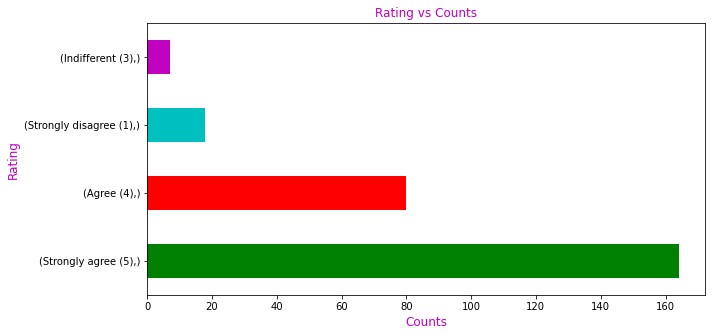

In [169]:
website.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'm', fontsize = 12)
plt.ylabel('Rating', c = 'm', fontsize = 12 )
plt.title('Rating vs Counts', c = 'm', fontsize = 12)
plt.show()

#### Above plot shows people who strongly agree give highest rating 👍👍

### 19 Information on similar product to the one highlighted is important for product comparison column

In [200]:
com = df2.iloc[:,[18]].value_counts()
com

19 Information on similar product to the one highlighted  is important for product comparison
Strongly agree (5)                                                                               116
Agree (4)                                                                                         92
Indifferent (3)                                                                                   43
Dis-agree (2)                                                                                     18
dtype: int64

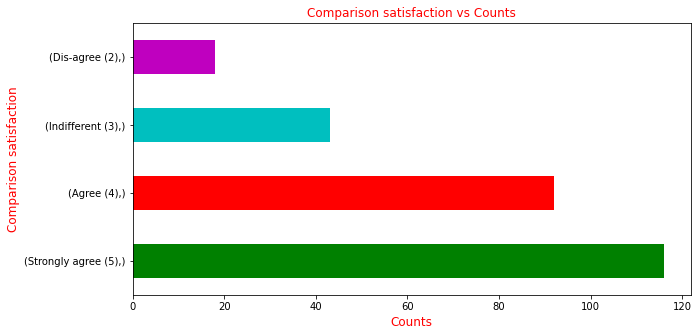

In [201]:
com.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Comparison satisfaction', c = 'r', fontsize = 12 )
plt.title('Comparison satisfaction vs Counts', c = 'r', fontsize = 12)
plt.show()

### 20 Complete information on listed seller and product being offered is important for purchase decision. column

In [203]:
seller = df2.iloc[:,[19]].value_counts()
seller

20 Complete information on listed seller and product being offered is important for purchase decision.
Agree (4)                                                                                                 101
Strongly agree (5)                                                                                         87
Indifferent (3)                                                                                            52
Dis-agree (2)                                                                                              18
Strongly disagree (1)                                                                                      11
dtype: int64

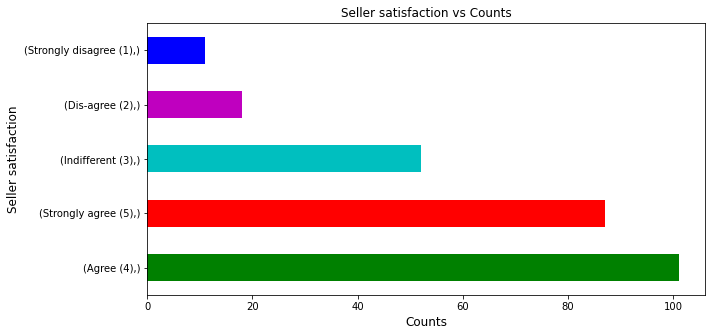

In [204]:
seller.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'k', fontsize = 12)
plt.ylabel('Seller satisfaction', c = 'k', fontsize = 12 )
plt.title('Seller satisfaction vs Counts', c = 'k', fontsize = 12)
plt.show()

#### Above plot shows most of the seller satisfied 👍👍

### 21 All relevant information on listed products must be stated clearly column

In [206]:
rel = df2.iloc[:,[20]].value_counts()
rel

21 All relevant information on listed products must be stated clearly
Agree (4)                                                                132
Strongly agree (5)                                                       107
Strongly disagree (1)                                                     18
Dis-agree (2)                                                             12
dtype: int64

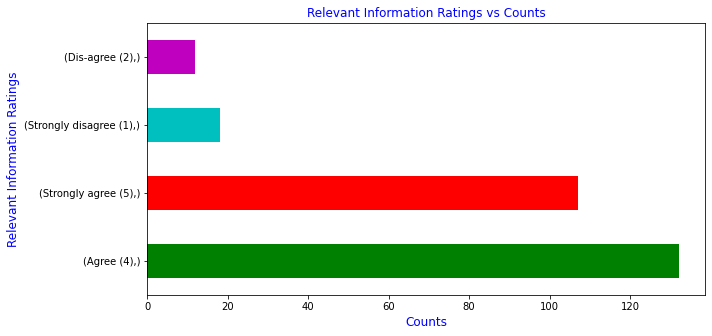

In [207]:
rel.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'b', fontsize = 12)
plt.ylabel('Relevant Information Ratings', c = 'b', fontsize = 12 )
plt.title('Relevant Information Ratings vs Counts', c = 'b', fontsize = 12)
plt.show()

### 22 Ease of navigation in website column

In [209]:
nav = df2.iloc[:,[21]].value_counts()
nav

22 Ease of navigation in website
Strongly agree (5)                  141
Agree (4)                           105
Strongly disagree (1)                18
Dis-agree (2)                         5
dtype: int64

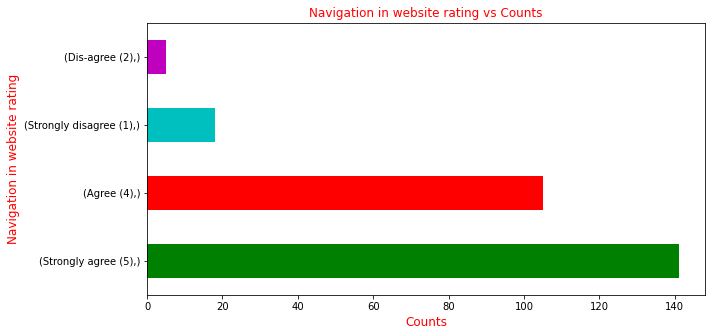

In [210]:
nav.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Navigation in website rating', c = 'r', fontsize = 12 )
plt.title('Navigation in website rating vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows which website easy to navigate has highest rating counts 👍👍

### 23 Loading and processing speed column

In [212]:
load = df2.iloc[:,[22]].value_counts()
load

23 Loading and processing speed
Strongly agree (5)                 115
Agree (4)                          112
Dis-agree (2)                       18
Indifferent (3)                     12
Strongly disagree (1)               12
dtype: int64

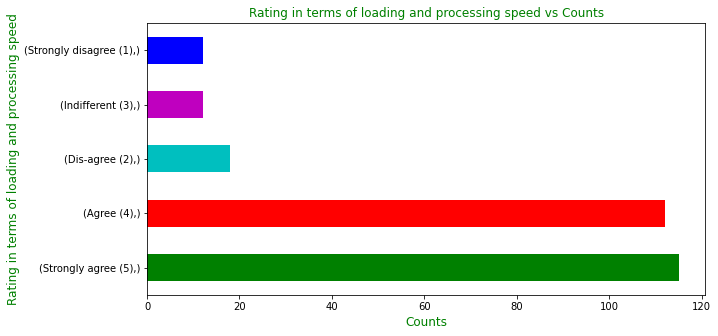

In [214]:
load.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'g', fontsize = 12)
plt.ylabel('Rating in terms of loading and processing speed', c = 'g', fontsize = 12 )
plt.title('Rating in terms of loading and processing speed vs Counts', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows people gives high rating which website loading and processing speed is good 👍👍

### 24 User friendly Interface of the website column

In [216]:
ufi = df2.iloc[:,[23]].value_counts()
ufi

24 User friendly Interface of the website
Strongly agree (5)                           189
Agree (4)                                     45
Strongly disagree (1)                         18
Dis-agree (2)                                 12
Indifferent (3)                                5
dtype: int64

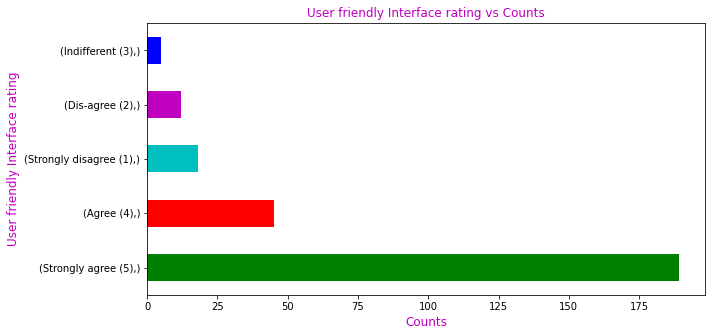

In [217]:
ufi.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'm', fontsize = 12)
plt.ylabel('User friendly Interface rating', c = 'm', fontsize = 12 )
plt.title('User friendly Interface rating vs Counts', c = 'm', fontsize = 12)
plt.show()

#### Above plot shows which website has User friendly Interface has highest rating counts 👍👍

### 25 Convenient Payment methods column

In [219]:
conpay = df2.iloc[:,[24]].value_counts()
conpay

25 Convenient Payment methods
Strongly agree (5)               159
Agree (4)                         80
Dis-agree (2)                     30
dtype: int64

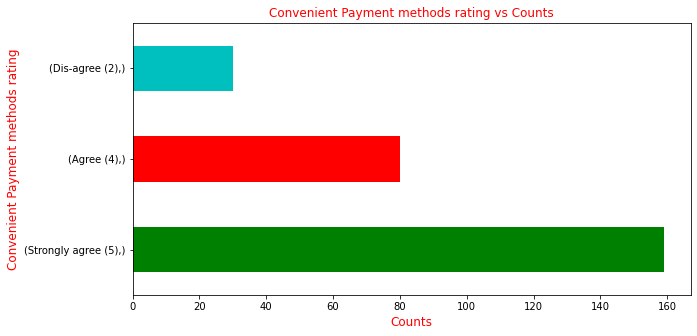

In [220]:
conpay.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Convenient Payment methods rating', c = 'r', fontsize = 12 )
plt.title('Convenient Payment methods rating vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows which website offer Convenient Payment methods has highest rating counts 👍👍

### 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time column

In [222]:
ret = df2.iloc[:,[25]].value_counts()
ret

26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time
Strongly agree (5)                                                                                       141
Agree (4)                                                                                                 86
Disagree (2)                                                                                              30
indifferent  (3)                                                                                          12
dtype: int64

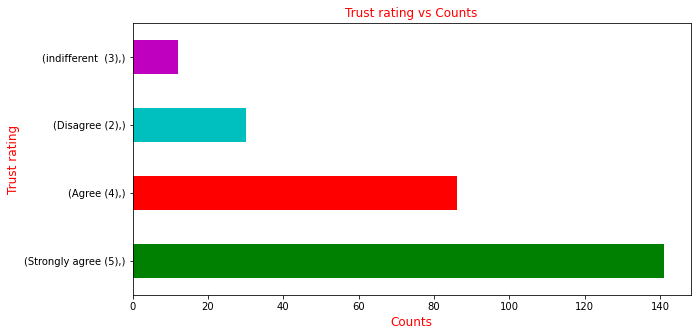

In [223]:
ret.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Trust rating', c = 'r', fontsize = 12 )
plt.title('Trust rating vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows people which have trust give high rating  👍👍

### 27 Empathy (readiness to assist with queries) towards the customers column

In [225]:
emp = df2.iloc[:,[26]].value_counts()
emp

27 Empathy (readiness to assist with queries) towards the customers
Strongly agree (5)                                                     194
Agree (4)                                                               42
Strongly disagree (1)                                                   18
indifferent (3)                                                         15
dtype: int64

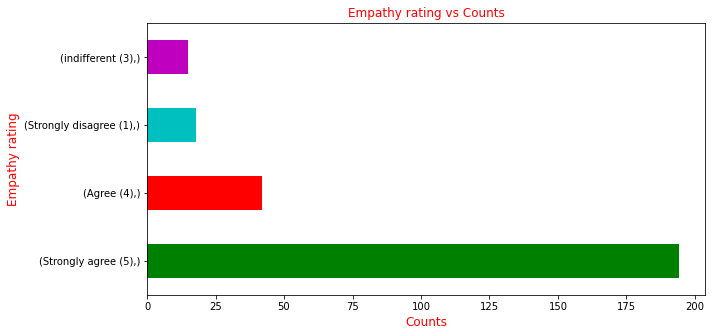

In [226]:
emp.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Empathy rating', c = 'r', fontsize = 12 )
plt.title('Empathy rating vs Counts', c = 'r', fontsize = 12)
plt.show()

### 28 Being able to guarantee the privacy of the customer column

In [229]:
pri = df2.iloc[:,[27]].value_counts()
pri

28 Being able to guarantee the privacy of the customer
Strongly agree (5)                                        185
Agree (4)                                                  58
indifferent (3)                                            26
dtype: int64

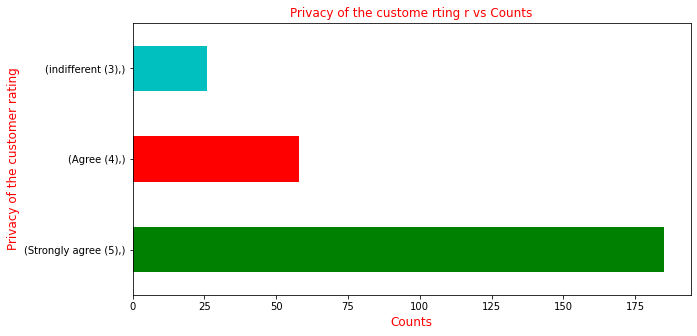

In [230]:
pri.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Privacy of the customer rating', c = 'r', fontsize = 12 )
plt.title('Privacy of the custome rting r vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows people give high rating who insure guarantee the privacy of the customer 👍👍

### 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) column

In [232]:
Responsiveness = df2.iloc[:,[28]].value_counts()
Responsiveness

29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
Strongly agree (5)                                                                                            149
Agree (4)                                                                                                      94
indifferent (3)                                                                                                15
Strongly disagree (1)                                                                                          11
dtype: int64

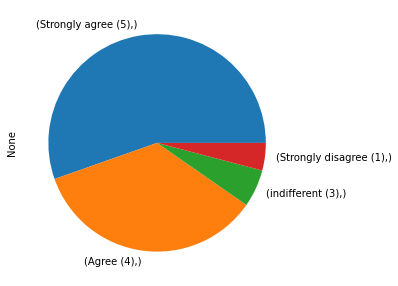

In [236]:
Responsiveness.plot.pie(figsize = (5,5))
plt.show()

#### Above plot shows people give high rating who has Responsiveness 👍👍

### 30 Online shopping gives monetary benefit and discounts count

In [238]:
benifit = df2.iloc[:,[29]].value_counts()
benifit

30 Online shopping gives monetary benefit and discounts
Strongly agree (5)                                         105
Agree (4)                                                   85
indifferent (3)                                             50
Strongly disagree (1)                                       18
Dis-agree (2)                                               11
dtype: int64

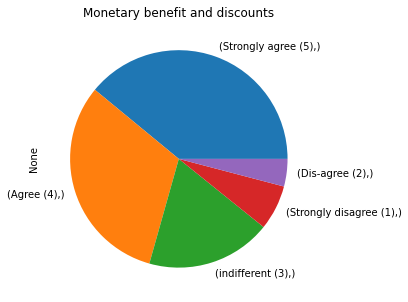

In [241]:
benifit.plot.pie(figsize = (5,5))
plt.title('Monetary benefit and discounts')
plt.show()

#### Above plot shows people give more ratig who provide monetary benefit and discounts to customers 👍👍

### 31 Enjoyment is derived from shopping online column

In [243]:
enj = df2.iloc[:,[30]].value_counts()
enj

31 Enjoyment is derived from shopping online
Strongly agree (5)                              86
indifferent (3)                                 75
Agree (4)                                       59
Strongly disagree (1)                           30
Dis-agree (2)                                   19
dtype: int64

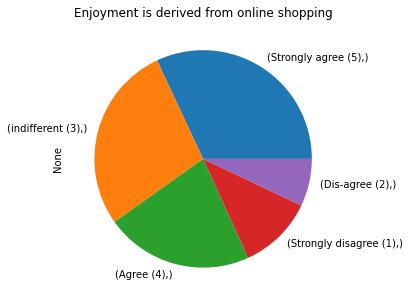

In [244]:
enj.plot.pie(figsize = (5,5))
plt.title('Enjoyment is derived from online shopping')
plt.show()

### 32 Shopping online is convenient and flexible column

In [246]:
flex = df2.iloc[:,[31]].value_counts()
flex

32 Shopping online is convenient and flexible
Strongly agree (5)                               146
Agree (4)                                         78
indifferent (3)                                   33
Dis-agree (2)                                     12
dtype: int64

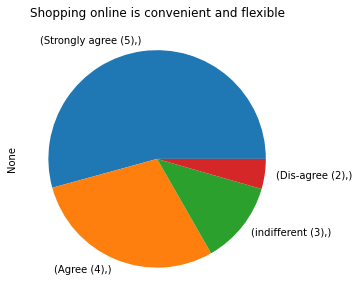

In [247]:
flex.plot.pie(figsize = (5,5))
plt.title('Shopping online is convenient and flexible')
plt.show()

#### Above plot shows who provide convenient and flexible online shopping highest rating 👍👍

### 33 Return and replacement policy of the e-tailer is important for purchase decision column

In [249]:
replace = df2.iloc[:,[32]].value_counts()
replace

33 Return and replacement policy of the e-tailer is important for purchase decision
Strongly agree (5)                                                                     198
Agree (4)                                                                               51
Dis-agree (2)                                                                           20
dtype: int64

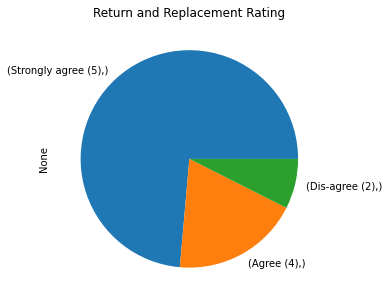

In [250]:
replace.plot.pie(figsize = (5,5))
plt.title('Return and Replacement Rating')
plt.show()

#### Above plot shows people give high rating who give return and replacement option 👍👍

### 34 Gaining access to loyalty programs is a benefit of shopping online column 

In [252]:
loy = df2.iloc[:,[33]].value_counts()
loy

34 Gaining access to loyalty programs is a benefit of shopping online
Strongly agree (5)                                                       115
Agree (4)                                                                 64
indifferent (3)                                                           64
Dis-agree (2)                                                             15
Strongly disagree (1)                                                     11
dtype: int64

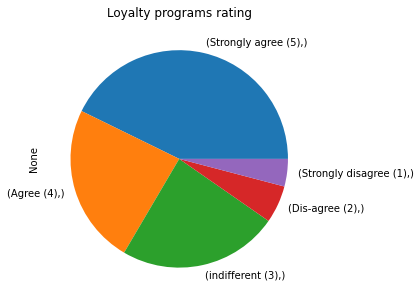

In [254]:
loy.plot.pie(figsize = (5,5))
plt.title('Loyalty programs rating')
plt.show()

### 35 Displaying quality Information on the website improves satisfaction of customers column

In [256]:
dis = df2.iloc[:,[34]].value_counts()
dis

35 Displaying quality Information on the website improves satisfaction of customers
Strongly agree (5)                                                                     133
Agree (4)                                                                               80
indifferent (3)                                                                         56
dtype: int64

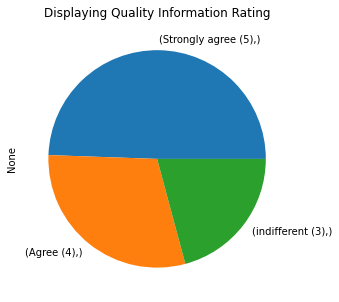

In [257]:
dis.plot.pie(figsize = (5,5))
plt.title('Displaying Quality Information Rating')
plt.show()

#### Above plot shows people give more rating who give Displaying Quality Information to the customers 👍👍

### 36 User derive satisfaction while shopping on a good quality website or application column

In [259]:
user = df2.iloc[:,[35]].value_counts()
user

36 User derive satisfaction while shopping on a good quality website or application
Strongly agree (5)                                                                     175
Agree (4)                                                                               86
Dis-agree (2)                                                                            8
dtype: int64

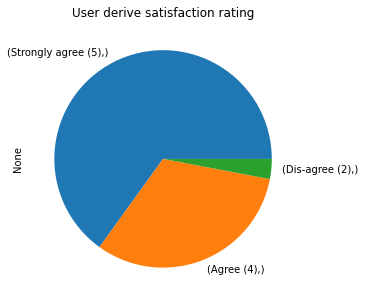

In [260]:
user.plot.pie(figsize = (5,5))
plt.title('User derive satisfaction rating')
plt.show()

#### Above plot shows people give high rating who provide a good quality website or application 👍👍

### 37 Net Benefit derived from shopping online can lead to users satisfaction column

In [262]:
net = df2.iloc[:,[36]].value_counts()
net

37 Net Benefit derived from shopping online can lead to users satisfaction
Strongly agree (5)                                                            164
Agree (4)                                                                      54
indifferent (3)                                                                40
Dis-agree (2)                                                                  11
dtype: int64

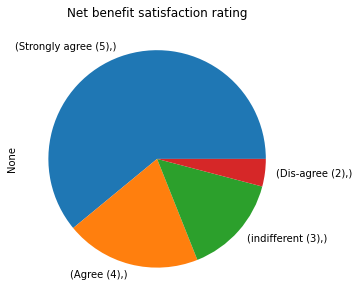

In [263]:
net.plot.pie(figsize = (5,5))
plt.title('Net benefit satisfaction rating')
plt.show()

### 39 Offering a wide variety of listed product in several category column

In [265]:
wide = df2.iloc[:,[38]].value_counts()
wide

39 Offering a wide variety of listed product in several category
Strongly agree (5)                                                  111
Agree (4)                                                            94
indifferent (3)                                                      57
Dis-agree (2)                                                         7
dtype: int64

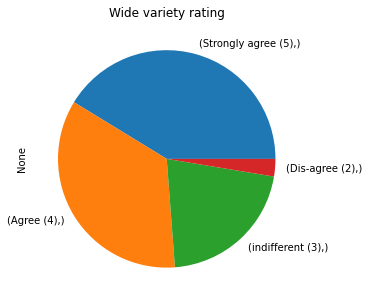

In [267]:
wide.plot.pie(figsize = (5,5))
plt.title('Wide variety rating')
plt.show()

### 40 Provision of complete and relevant product information column

In [269]:
prov = df2.iloc[:,[39]].value_counts()
prov

40 Provision of complete and relevant product information
Strongly agree (5)                                           135
Agree (4)                                                     98
indifferent (3)                                               31
Disagree (2)                                                   5
dtype: int64

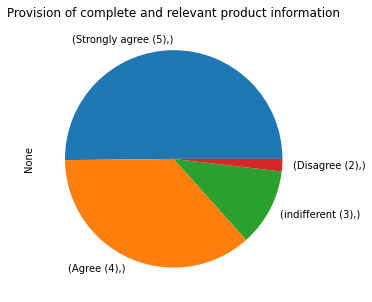

In [271]:
prov.plot.pie(figsize = (5,5))
plt.title('Provision of complete and relevant product information')
plt.show()

### 41 Monetary savings column 

In [273]:
sav = df2.iloc[:,[40]].value_counts()
sav

41 Monetary savings
Strongly agree (5)     148
Agree (4)               75
Disagree (2)            31
indifferent (3)         15
dtype: int64

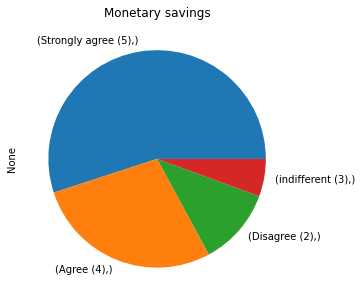

In [274]:
sav.plot.pie(figsize = (5,5))
plt.title('Monetary savings')
plt.show()

#### Above plot shows who have Monetary savings give highest rating 👍👍

### 42 The Convenience of patronizing the online retailer column

In [276]:
pat = df2.iloc[:,[41]].value_counts()
pat

42 The Convenience of patronizing the online retailer
Agree (4)                                                138
indifferent (3)                                           77
Strongly agree (5)                                        54
dtype: int64

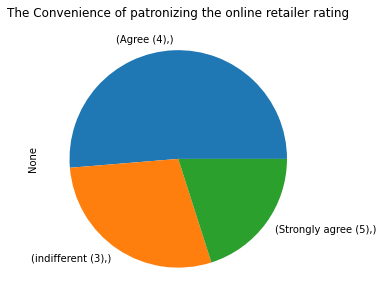

In [277]:
pat.plot.pie(figsize = (5,5))
plt.title('The Convenience of patronizing the online retailer rating')
plt.show()

### 43 Shopping on the website gives you the sense of adventure column

In [281]:
adv = df2.iloc[:,[42]].value_counts()
adv

43 Shopping on the website gives you the sense of adventure
Agree (4)                                                      101
indifferent (3)                                                 59
Strongly agree (5)                                              54
Dis-agree (2)                                                   50
Strongly disagree (1)                                            5
dtype: int64

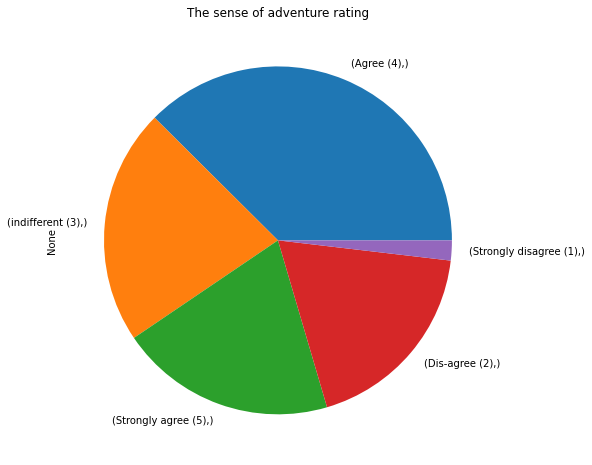

In [284]:
adv.plot.pie(figsize = (8,8))
plt.title('The sense of adventure rating')
plt.show()

### 44 Shopping on your preferred e-tailer enhances your social status column

In [286]:
enh = df2.iloc[:,[43]].value_counts()
enh

44 Shopping on your preferred e-tailer enhances your social status
indifferent (3)                                                       100
Agree (4)                                                              59
Strongly agree (5)                                                     48
Strongly disagree (1)                                                  33
Dis-agree (2)                                                          29
dtype: int64

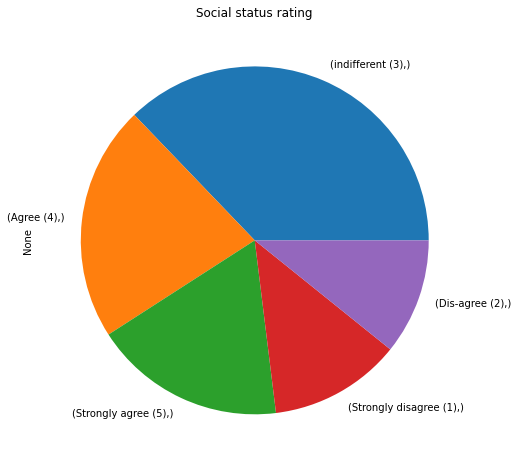

In [290]:
enh.plot.pie(figsize = (8,8))
plt.title('Social status rating')
plt.show()

### 45 You feel gratification shopping on your favorite e-tailer column

In [292]:
feel = df2.iloc[:,[44]].value_counts()
feel

45 You feel gratification shopping on your favorite e-tailer
indifferent (3)                                                 101
Strongly agree (5)                                               65
Agree (4)                                                        63
Disagree (2)                                                     22
Strongly disagree (1)                                            18
dtype: int64

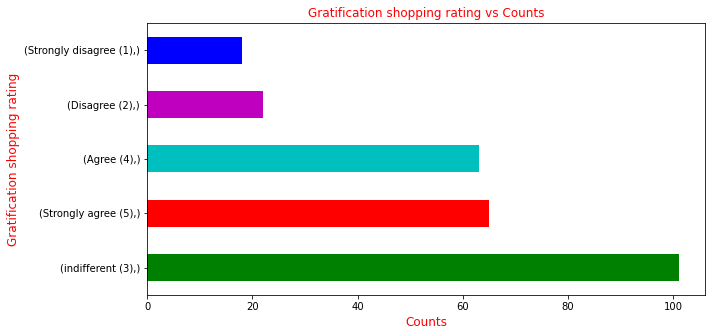

In [295]:
feel.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'r', fontsize = 12)
plt.ylabel('Gratification shopping rating', c = 'r', fontsize = 12 )
plt.title('Gratification shopping rating vs Counts', c = 'r', fontsize = 12)
plt.show()

### 46 Shopping on the website helps you fulfill certain roles column

In [297]:
roles = df2.iloc[:,[45]].value_counts()
roles

46 Shopping on the website helps you fulfill certain roles
Agree (4)                                                     88
indifferent (3)                                               88
Strongly agree (5)                                            38
Strongly disagree (1)                                         33
Dis-agree (2)                                                 22
dtype: int64

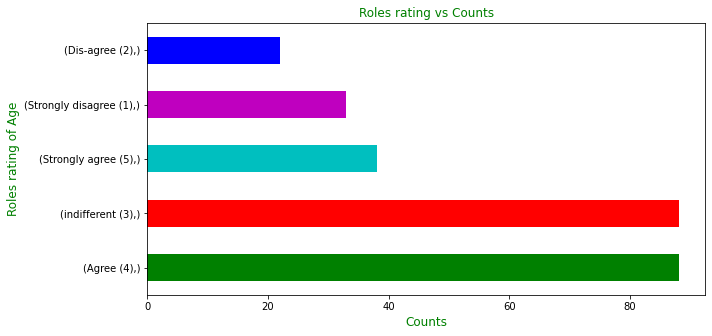

In [298]:
roles.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'g', fontsize = 12)
plt.ylabel('Roles rating of Age', c = 'g', fontsize = 12 )
plt.title('Roles rating vs Counts', c = 'g', fontsize = 12)
plt.show()

### 47 Getting value for money spent column

In [300]:
money = df2.iloc[:,[46]].value_counts()
money

47 Getting value for money spent
Agree (4)                           149
Strongly agree (5)                   82
indifferent (3)                      38
dtype: int64

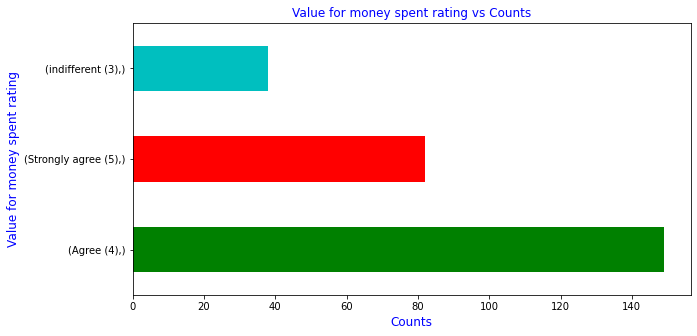

In [302]:
money.plot.barh(figsize = (10,5), color = ['g','r','c','m','b'])
plt.xlabel('Counts', c = 'b', fontsize = 12)
plt.ylabel('Value for money spent rating', c = 'b', fontsize = 12 )
plt.title('Value for money spent rating vs Counts', c = 'b', fontsize = 12)
plt.show()

### Endoding column

In [10]:
le = LabelEncoder()

In [11]:
df['3 Which city do you shop online from?'] = le.fit_transform(df['3 Which city do you shop online from?'])
df.head(2)

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1                                                  1                                                                                  

   12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                                  1                                                                                                                
1                                                  1                                                                                                                

   13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                                  1                                                                            
1                                                  4                                                                            

   14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                                  3                                                                                                           
1                                                  5                                                                                                           

   15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                                                  4                                                                                                                                    
1                                                  1                                                                                                                          

In [39]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 46 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype
---  ------                                                                                                                                                                                                          --------------  -----
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64
 1   2 How old are you?                                                                                                                                                                      

#### All columns are encoded

### Data distribution

---------------------
Distribution Plot :- 
---------------------


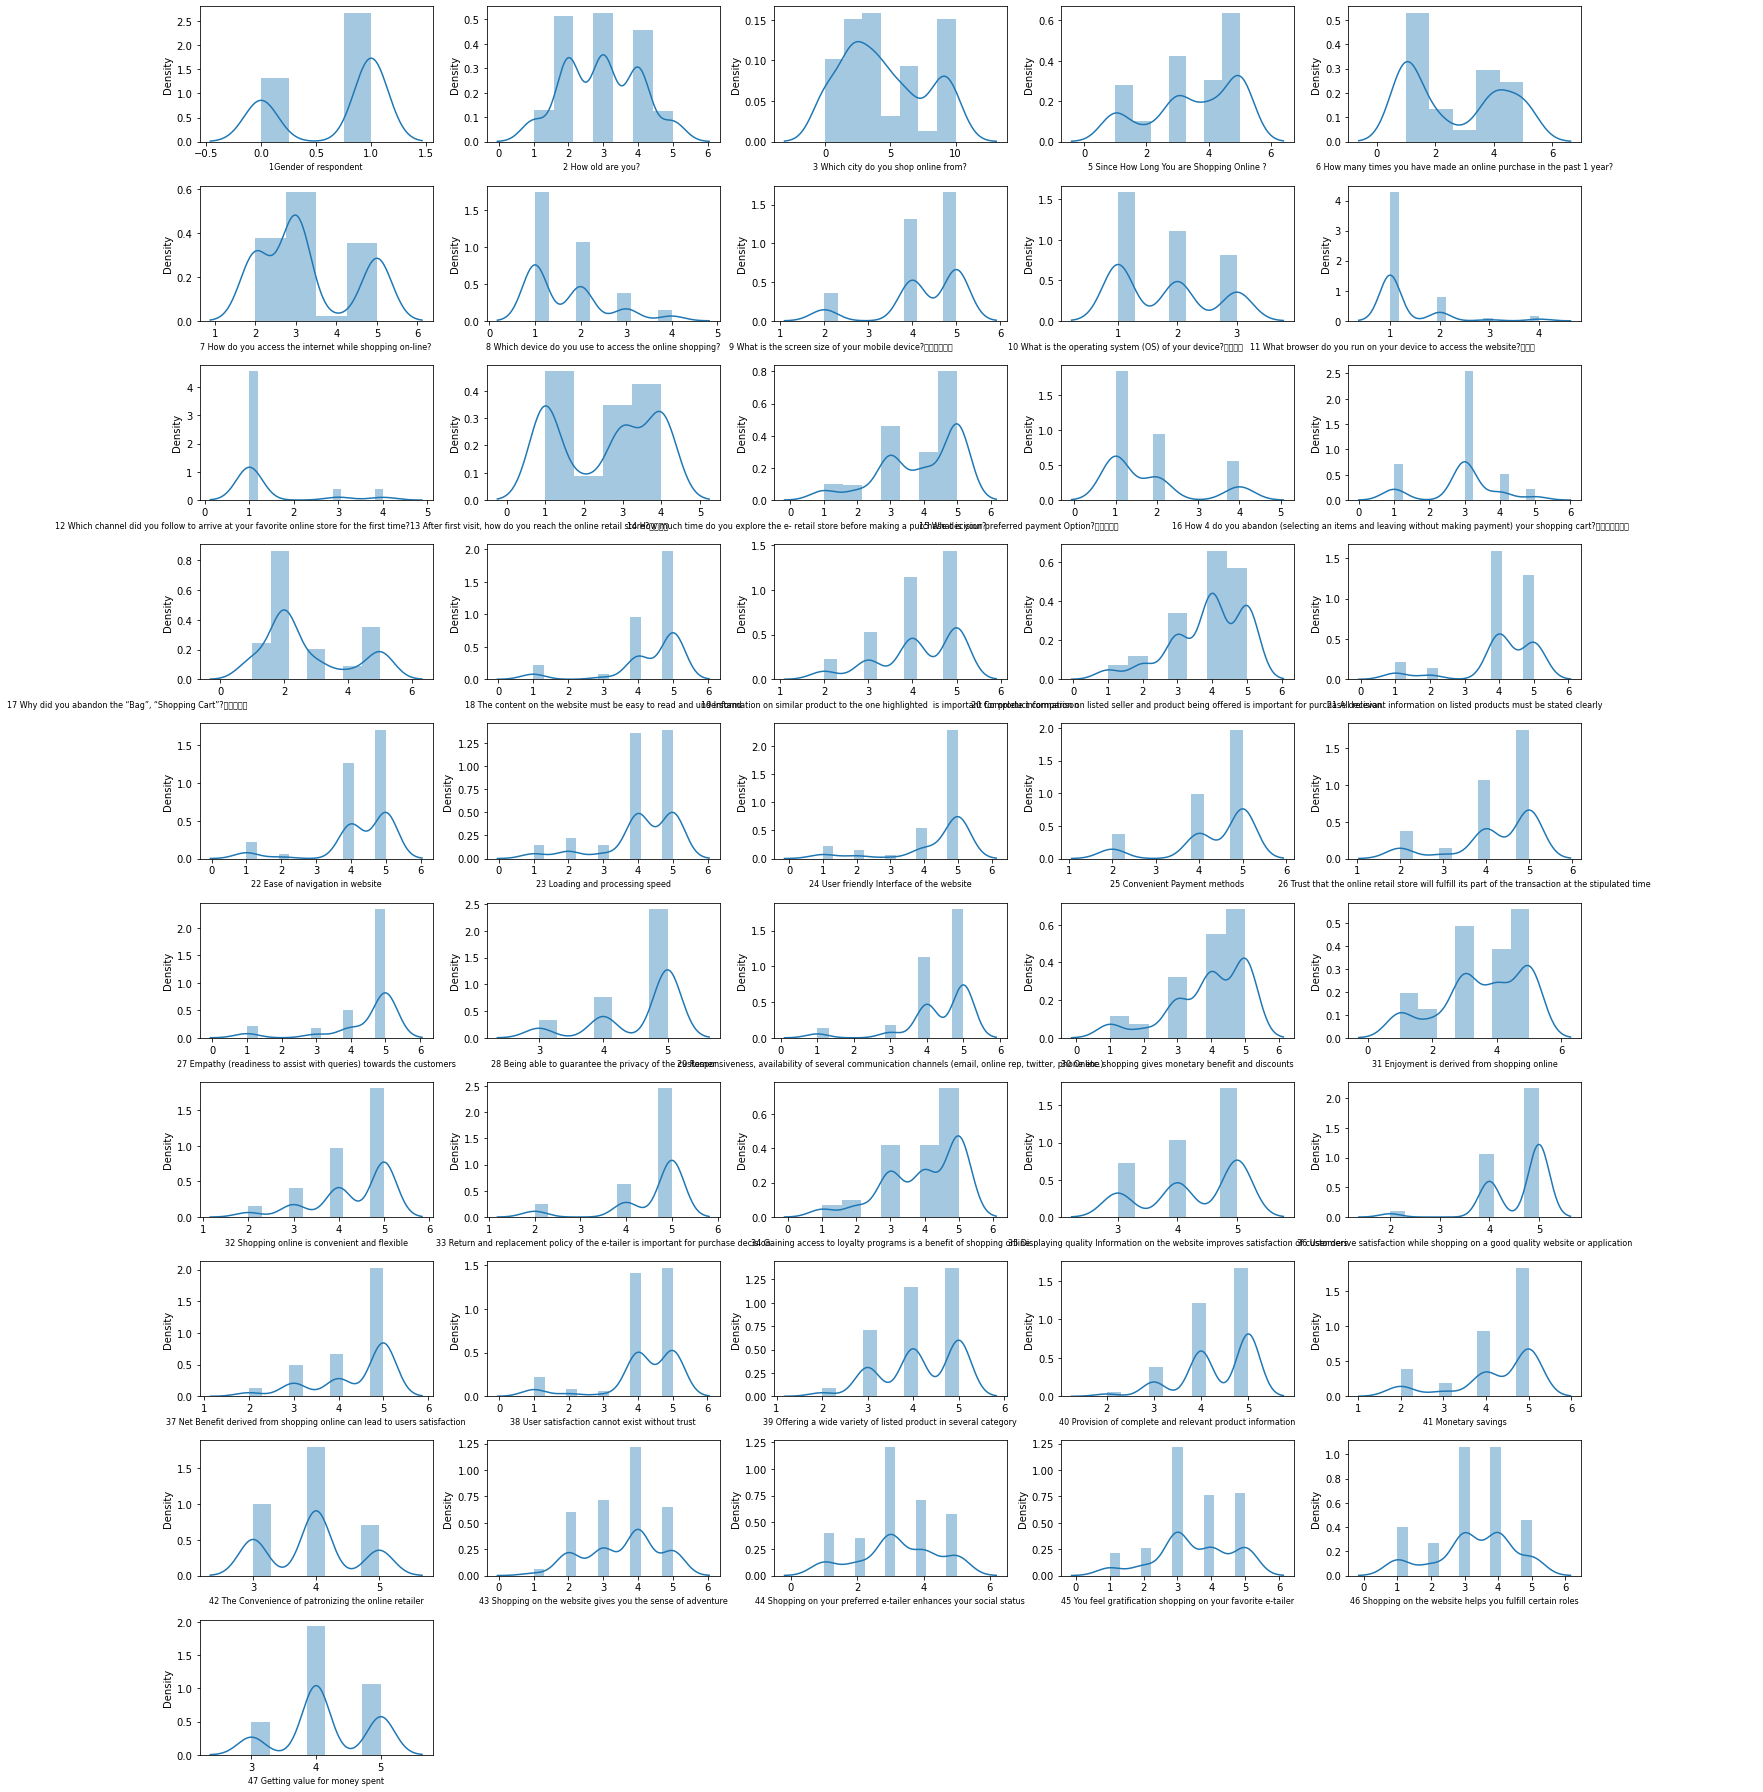

In [25]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=50:
        ax = plt.subplot(10,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 8)
    plotnumber +=1
plt.tight_layout()

In [28]:
df.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
3 Which city do you shop online from?                                                                                                                                                                                  0.313729
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
6 How many times you have made an online purchase in the past 1 year?                                   

#### Datas are skewed

### Checking Outlier 

------------
Box Plot :- 
------------


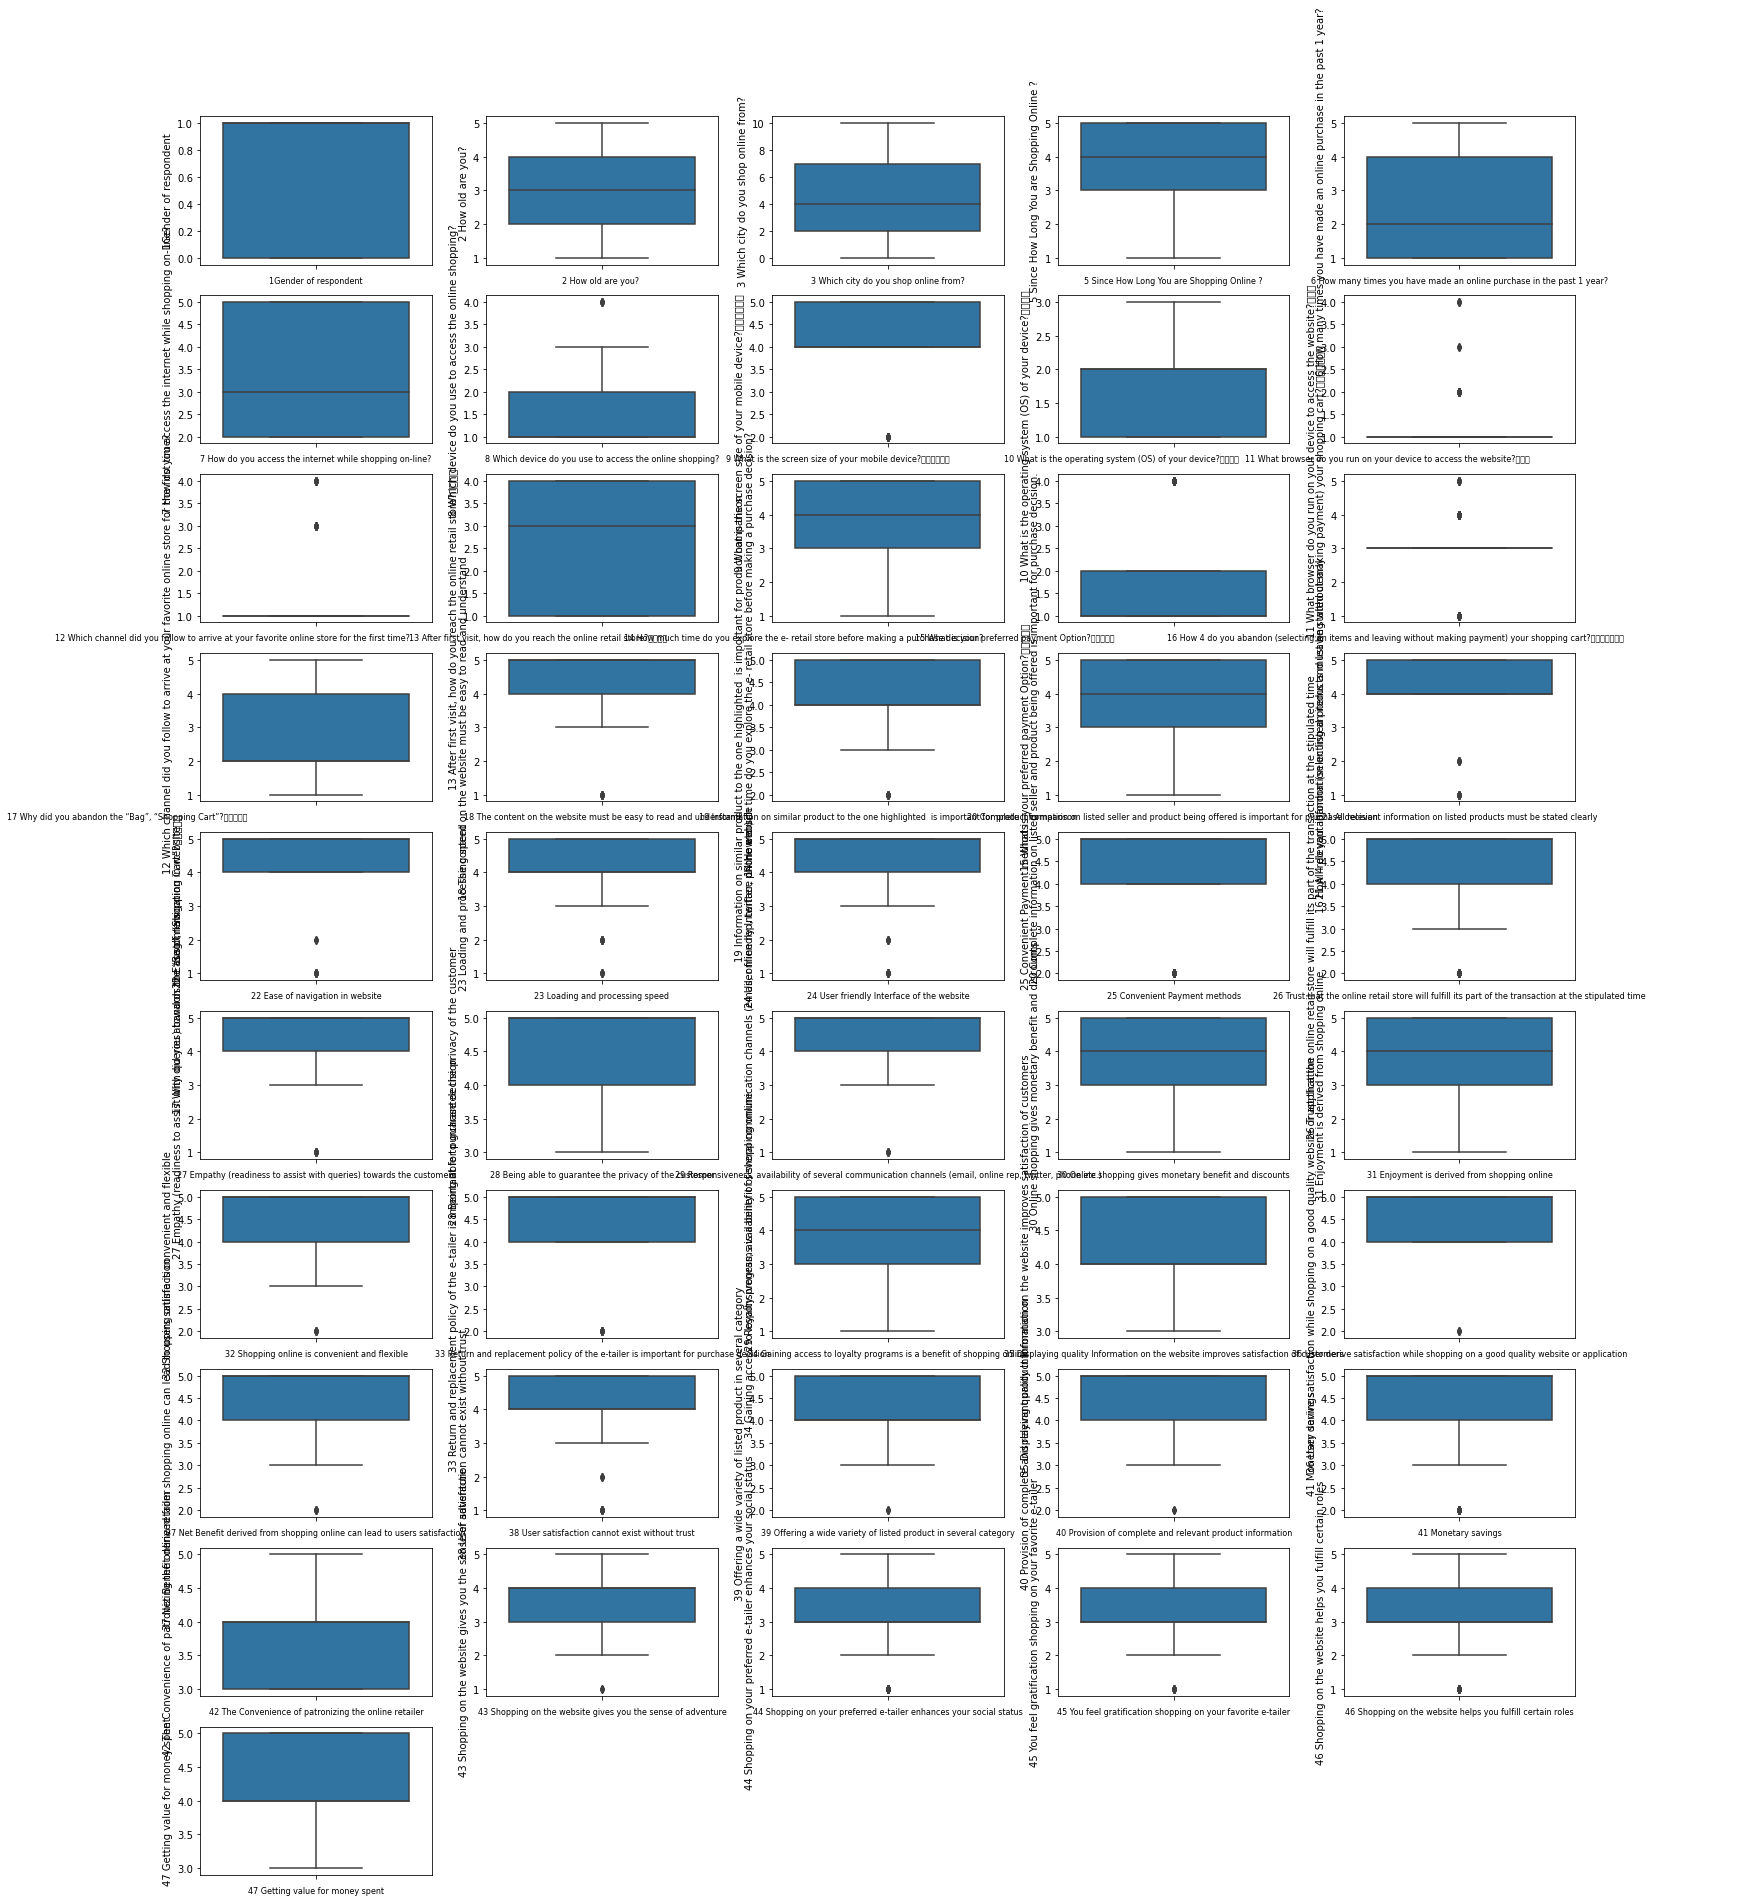

In [27]:
print('------------')
print('Box Plot :- ')
print('------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=50:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(y = df[column])
        plt.xlabel(column, fontsize = 8)
    plotnumber +=1
plt.tight_layout()

#### Data has outliers

### Corelation of Feature vs Label 

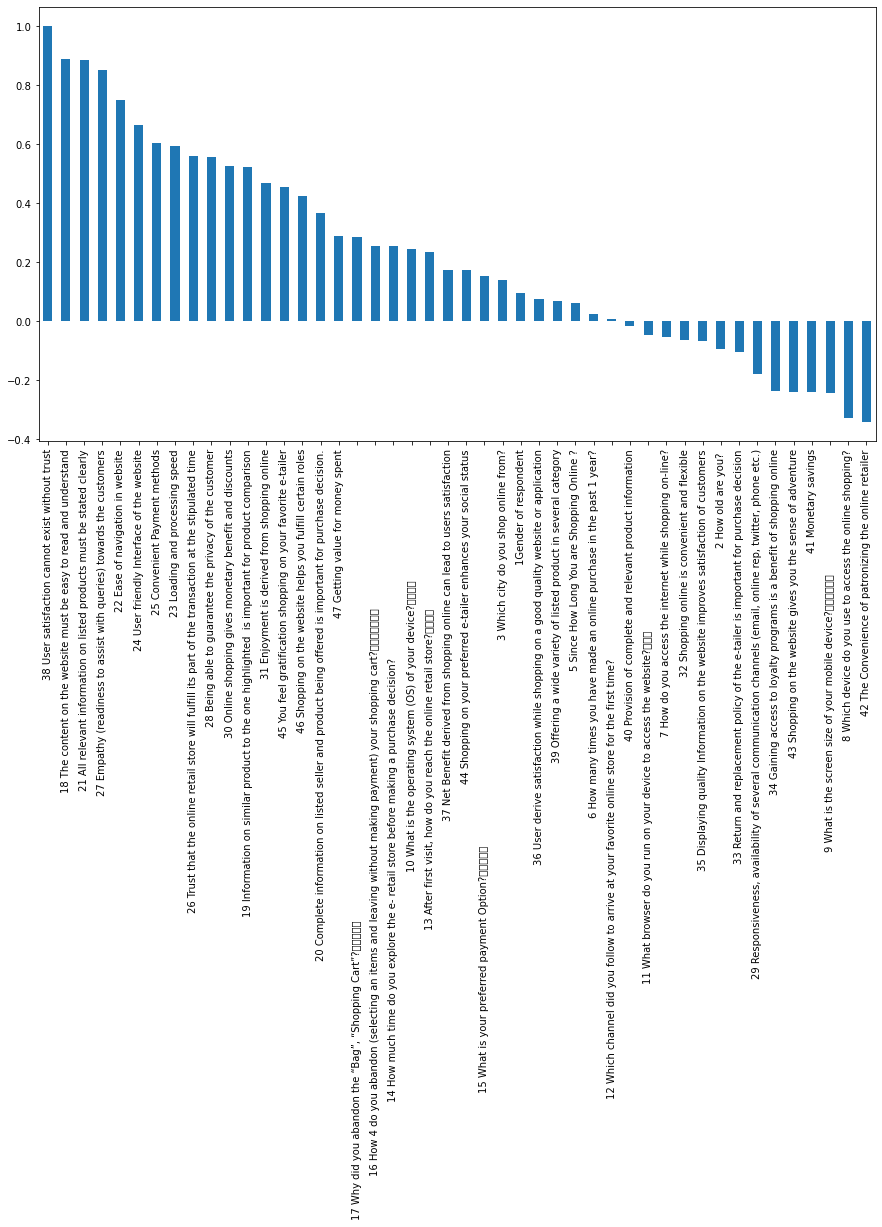

In [15]:
plt.figure(figsize=(15,8))
df.corr()['38 User satisfaction cannot exist without trust'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### Splitting Dataset into features and label

In [43]:
x = df.drop(df.iloc[:,[37]], axis = 1)
y = df.iloc[:,[37]]
print('Data has been splited')

Data has been splited


-----------------
Scatter Plot :-
-----------------


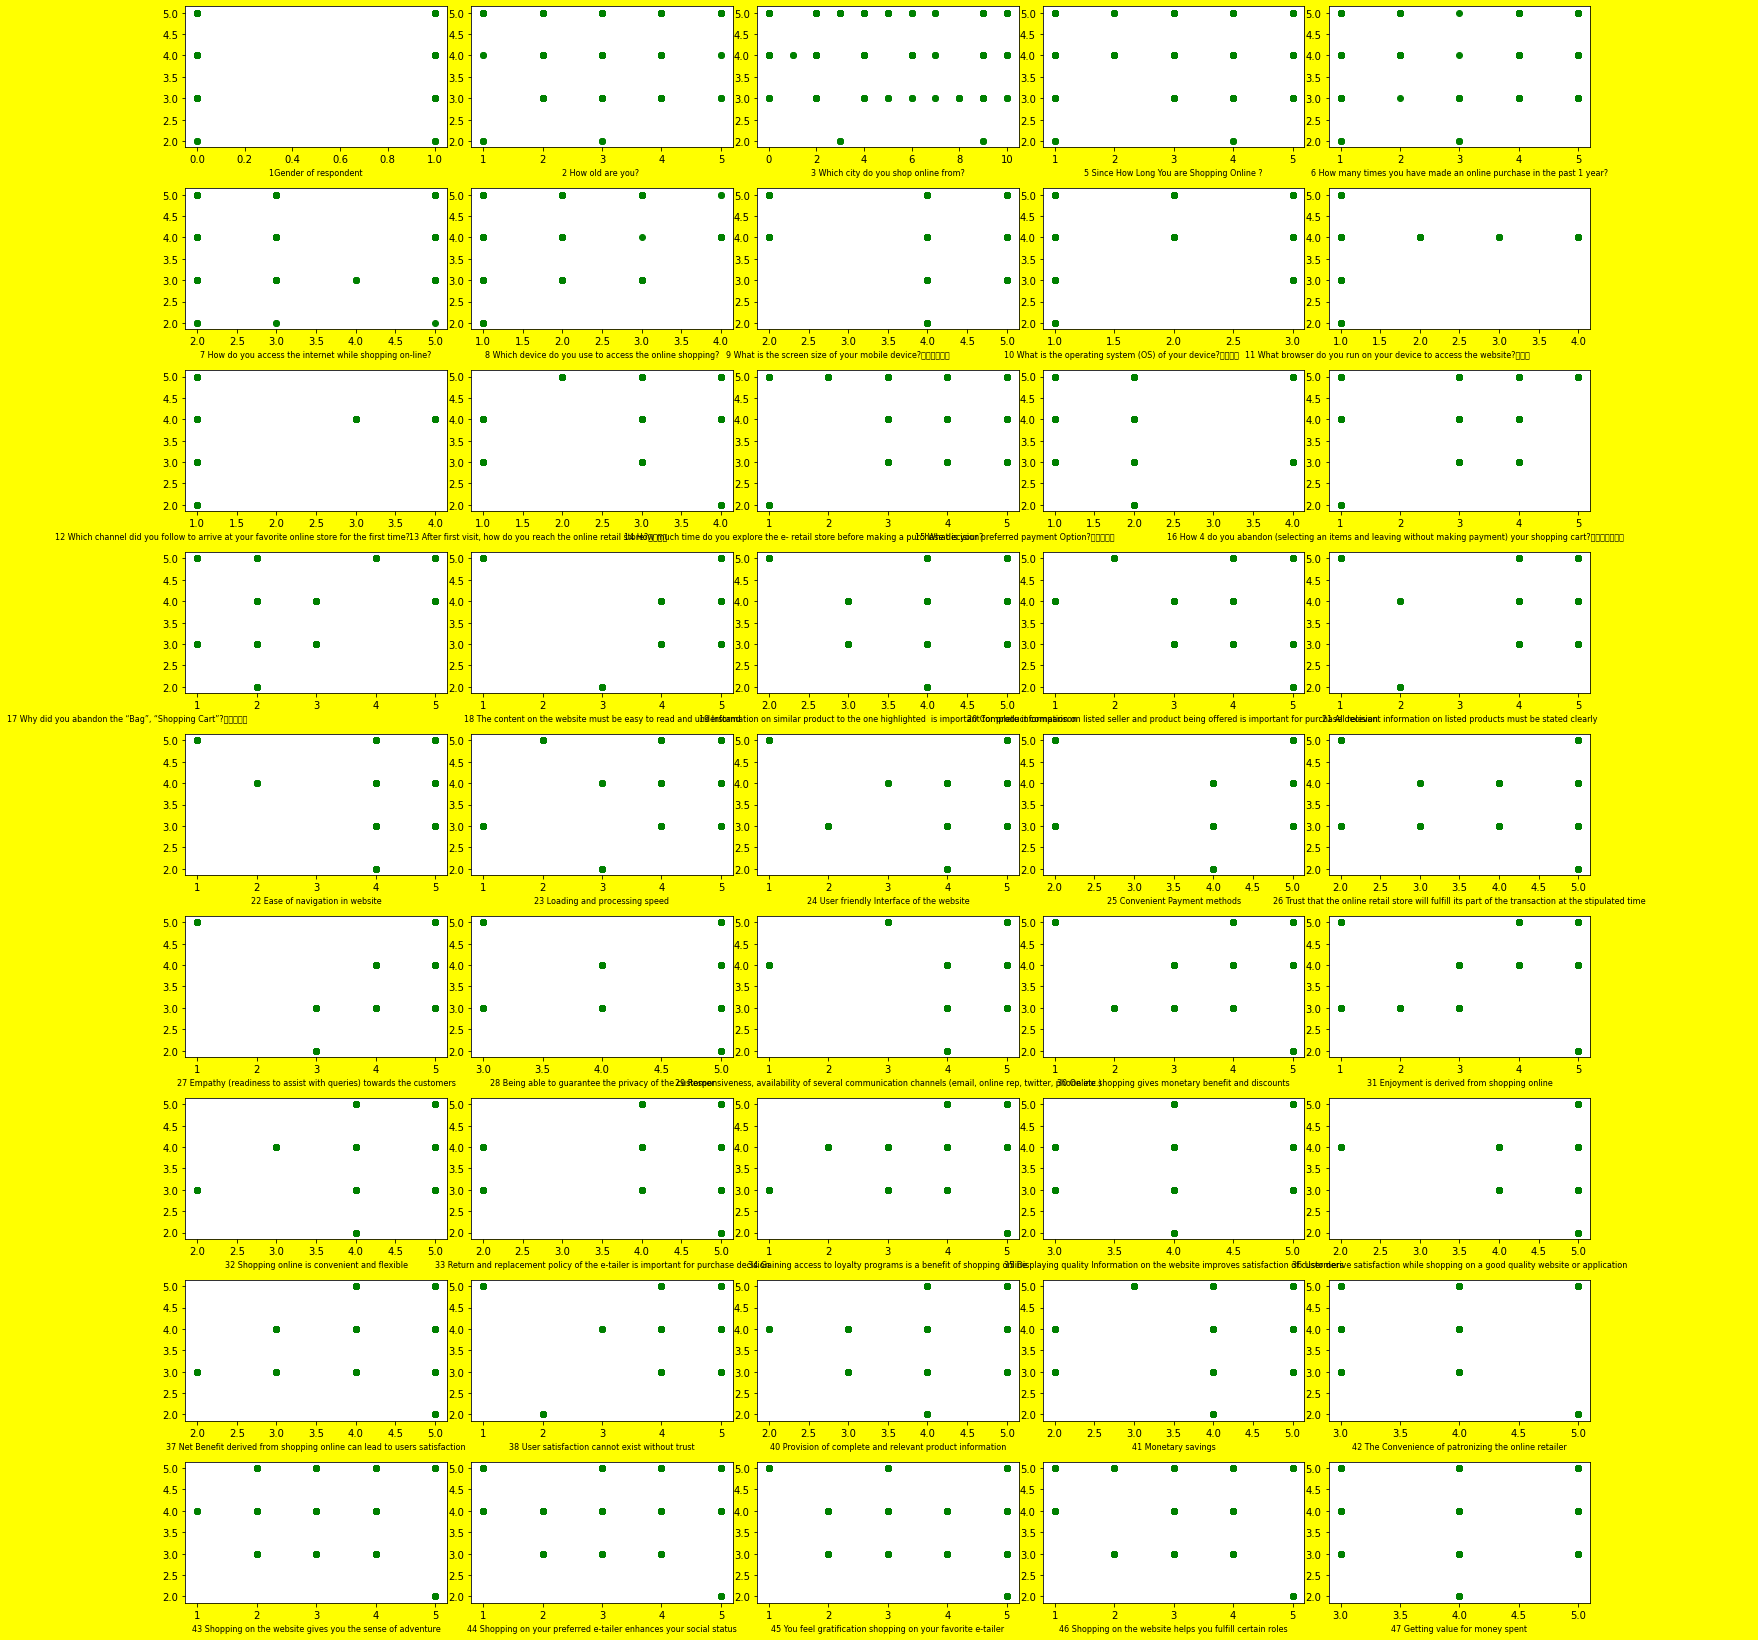

In [45]:
# Let' see relation between features and label.
print('-----------------')
print('Scatter Plot :-')
print('-----------------')

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <=50:
        ax = plt.subplot(10,5, plotnumber)
        plt.scatter(x[column],y, c = 'g')
        plt.xlabel(column, fontsize = 8)  
    plotnumber += 1
plt.tight_layout()

#### Positive relation in feature and label

### Checking for class imbalance

In [46]:
df.iloc[:,[37]].value_counts()

39 Offering a wide variety of listed product in several category
5                                                                   111
4                                                                    94
3                                                                    57
2                                                                     7
dtype: int64

#### Class are not balanced

### Handling Class Imbalance

In [47]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [48]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
39 Offering a wide variety of listed product in several category
2                                                                   111
3                                                                   111
4                                                                   111
5                                                                   111
dtype: int64
---------------------


### Data Scaling

In [49]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.  , 0.5 , 0.2 , ..., 1.  , 0.75, 1.  ],
       [1.  , 0.25, 0.2 , ..., 1.  , 1.  , 1.  ],
       [1.  , 0.25, 0.4 , ..., 0.5 , 0.5 , 0.5 ],
       ...,
       [1.  , 0.75, 0.  , ..., 0.75, 0.75, 0.5 ],
       [1.  , 0.  , 1.  , ..., 0.5 , 0.75, 0.  ],
       [1.  , 0.75, 0.3 , ..., 1.  , 1.  , 1.  ]])

#### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Building

### Decision Tree model instantiaing, training and evaluating

In [51]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [52]:
bag_dt.oob_score

True

In [53]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 1.0


In [54]:
y_pred = bag_dt.predict(x_test)

In [55]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        34

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------------------------------------------------------------



#### Conclusion : Decision Tree model has 100% score

### Cross Validation score to check if the model is overfitting

In [56]:
cv = cross_val_score(bag_dt, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 1.0


#### Conclusion : Decision Tree model has 100% Cross Validation score

### ROC, AUC Curve

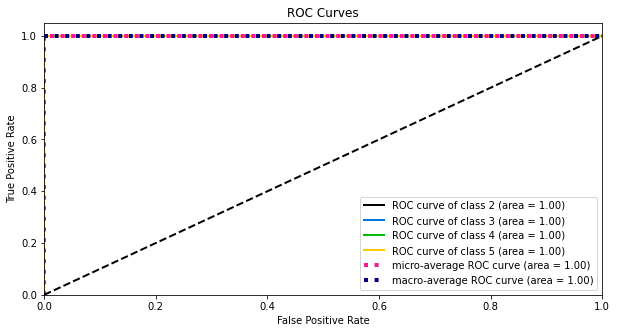

In [57]:
prob = bag_dt.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [58]:
bag_xgb = BaggingClassifier(xgb.XGBClassifier(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [59]:
bag_xgb.oob_score

True

In [60]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 1.0


In [61]:
y_pred = bag_xgb.predict(x_test)

In [62]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        34

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------------------------------------------------------------



#### Conclusion : XGBoost model has 100% score

### Cross Validation score to check if the model is overfitting

In [64]:
cv = cross_val_score(bag_xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 1.0


#### Conclusion : XGBoost model has 100% Cross Validation score

### ROC, AUC Curve

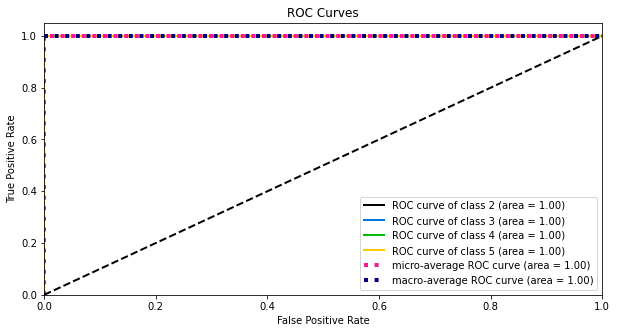

In [65]:
prob = bag_xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [66]:
bag_Knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [67]:
bag_Knn.oob_score

True

In [68]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.9819819819819819


In [69]:
y_pred = bag_dt.predict(x_test)

In [70]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        34

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------------------------------------------------------------



#### Conclusion : KNN model has 100% score

### Cross Validation score to check if the model is overfitting

In [74]:
cv = cross_val_score(bag_Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> nan


#### Conclusion : Knn model has nan Cross Validation score

### ROC, AUC Curve

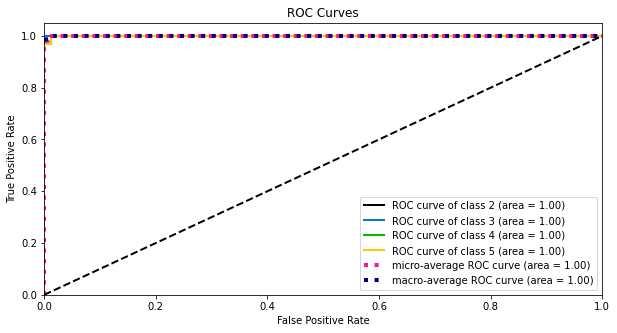

In [75]:
prob = bag_Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [76]:
bag_Rn = BaggingClassifier(RandomForestClassifier(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [77]:
bag_Rn.oob_score

True

In [78]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 1.0


In [79]:
y_pred = bag_Rn.predict(x_test)

In [80]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        34

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------------------------------------------------------------



#### Conclusion : Random Forest model has 100% score

### Cross Validation score to check if the model is overfitting

In [81]:
cv = cross_val_score(bag_Rn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 1.0


#### Conclusion : Random Forest model has 100% Cross Validation score

### ROC, AUC Curve

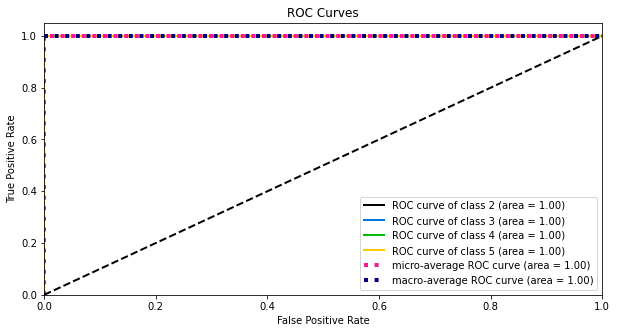

In [83]:
prob = bag_Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [84]:
bag_Lr = BaggingClassifier(LogisticRegression(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [85]:
bag_Lr.oob_score

True

In [86]:
bag_Lr.fit(x_train, y_train)
print('Bagging Logostic Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Logostic Regression score -------> 1.0


In [87]:
y_pred = bag_Lr.predict(x_test)

In [88]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        34

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 100% score

### Cross Validation score to check if the model is overfitting

In [89]:
cv = cross_val_score(bag_Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 1.0


#### Conclusion : Logistic Regression model has 100% Cross Validation score

### ROC, AUC Curve

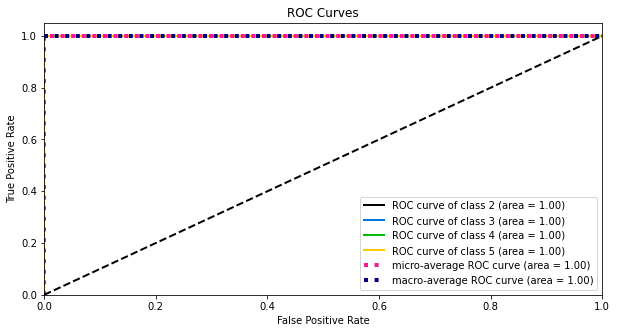

In [90]:
prob = bag_Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()